In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import * 
from matplotlib import pyplot as plt 
from tabulate import tabulate

In [2]:
print("Téléchargement du fichier CIF...")
structure = MPRester("XOCzg18zLbitVQMZilg0OGK9MJ5rjMXh").get_structure_by_material_id("mp-7173")
CifWriter(structure,0.1, write_magmoms=False).write_file("ScSbPt_mp-7173_symmetrized.cif")
print("Téléchargement terminé !")

Téléchargement du fichier CIF...


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement terminé !


In [3]:
xrd = XRDCalculator(symprec=0.1)
xrdpattern = xrd.get_pattern(structure)
hkls = xrdpattern.hkls

pic n°1 :

---------------------------------------  ------------------
Angle 2θ(en °) :                         24.245503173378044
Intensité (en %):                        82.17681778078409
Indices de Bravais-Miller (h,k,-h-k,l):  (1, 1, 1)
Multiplicité :                           8
Distance interplanaire :                 3.670928499020411


pic n°2 :

---------------------------------------  ------------------
Angle 2θ(en °) :                         28.067686235543047
Intensité (en %):                        0.5634024555730396
Indices de Bravais-Miller (h,k,-h-k,l):  (2, 0, 0)
Multiplicité :                           6
Distance interplanaire :                 3.1791173356279554


pic n°4 :

---------------------------------------  ------------------
Angle 2θ(en °) :                         47.42311014279311
Intensité (en %):                        41.95383303768926
Indices de Bravais-Miller (h,k,-h-k,l):  (3, 1, 1)
Multiplicité :                           24
Distance interplanaire :

AttributeError: 'Axes' object has no attribute 'show'

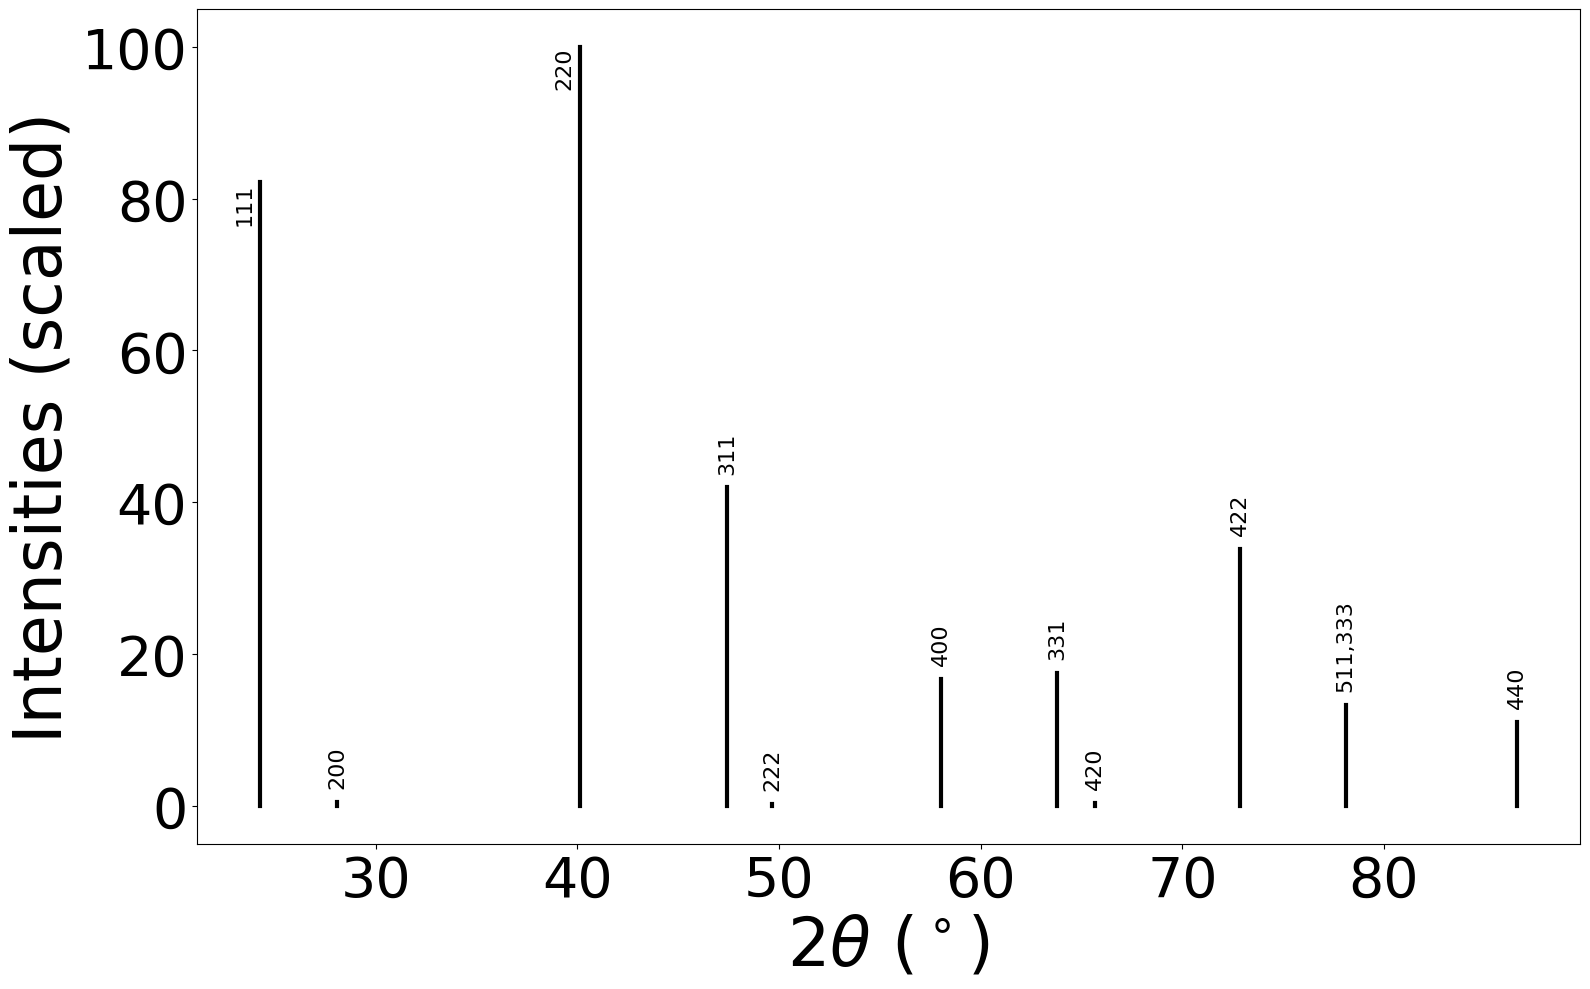

In [4]:
for i in range(0,3):
    if i==2:
        print(tabulate([
            ["Angle 2\u03B8(en \u00b0) : ",str(xrdpattern.x[i+1])],
            ["Intensité (en \u0025): ",str(xrdpattern.y[i+1])],
            ["Indices de Bravais-Miller (h,k,-h-k,l): ",str(xrdpattern.hkls[i+1][0]['hkl'])],
            ["Multiplicité : ",str(xrdpattern.hkls[i+1][0]['multiplicity'])],
            ["Distance interplanaire : ",xrdpattern.d_hkls[i+1]]],
            headers=["pic n\u00b0"+str(i+2)+" :\n",""]))
        print("\n")    
    else :
        print(tabulate([
            ["Angle 2\u03B8(en \u00b0) : ",str(xrdpattern.x[i])],
            ["Intensité (en \u0025): ",str(xrdpattern.y[i])],
            ["Indices de Bravais-Miller (h,k,-h-k,l): ",str(xrdpattern.hkls[i][0]['hkl'])],
            ["Multiplicité : ",str(xrdpattern.hkls[i][0]['multiplicity'])],
            ["Distance interplanaire : ",xrdpattern.d_hkls[i]]],
            headers=["pic n\u00b0"+str(i+1)+" :\n",""]))
        print("\n")
xrd.show_plot(structure)

AttributeError: 'Axes' object has no attribute 'show'

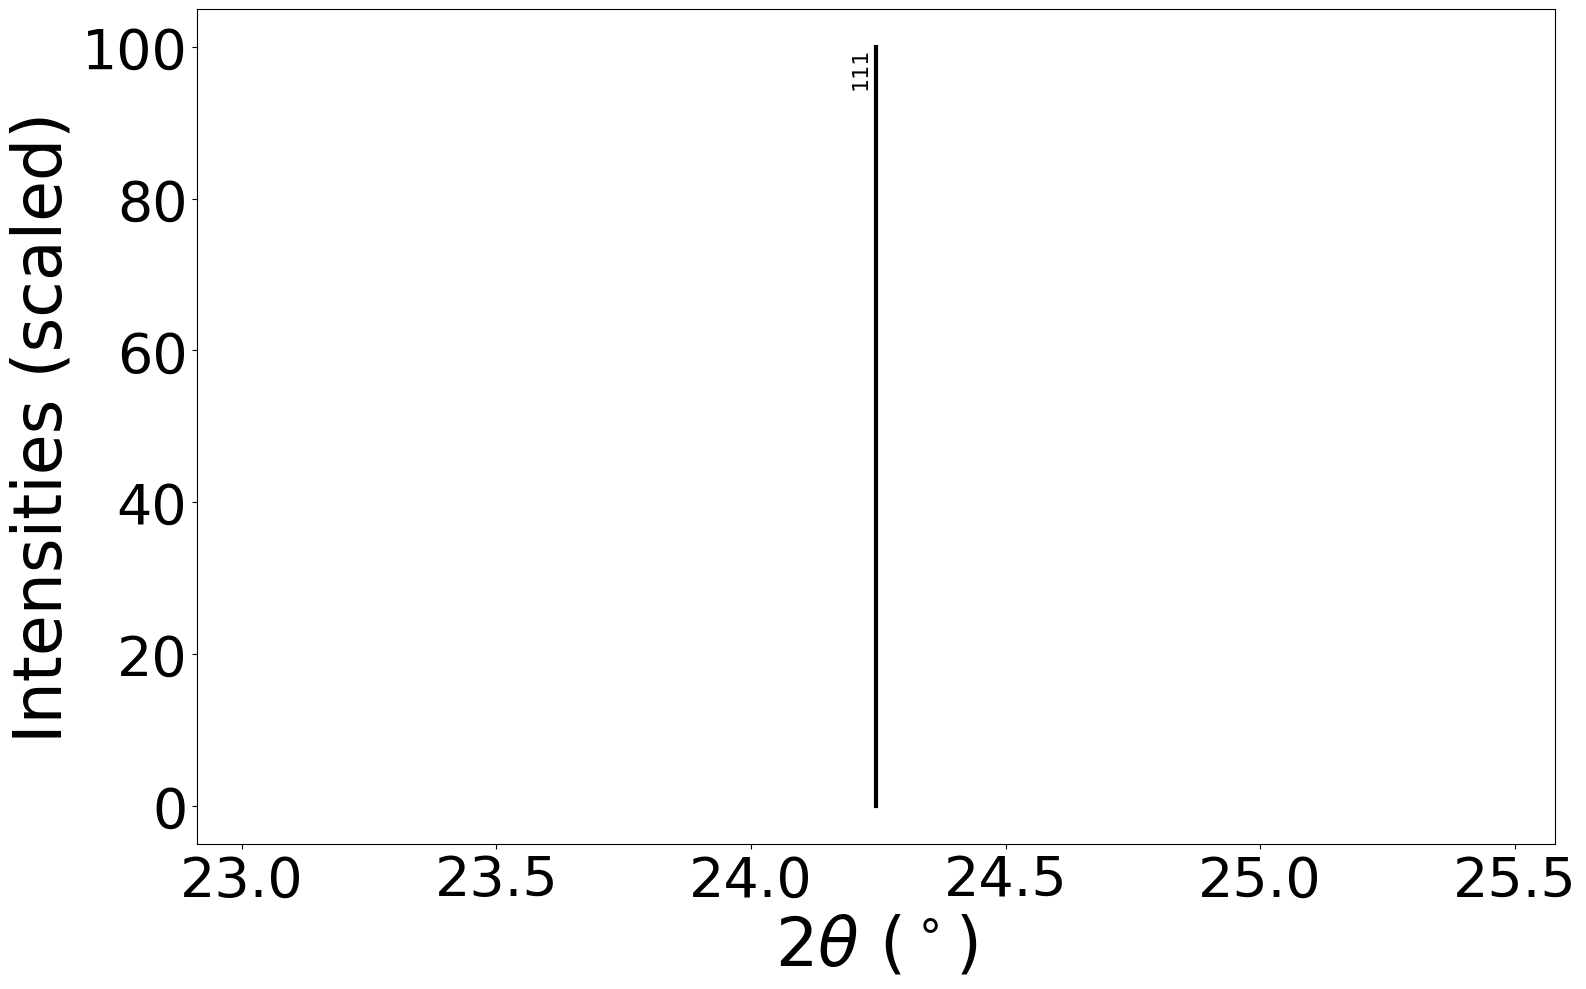

In [5]:
xrd.show_plot(structure,two_theta_range=[0,28])